# Equipo 4: José Derbez, Federico Medina, Eduardo Porcayo, Javier Hernández, Karen Ugalde

# Selección de datos

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

C = pd.ExcelFile("datos/BD_Tec_banderas_contaminantes.xlsx")

PM10 = pd.read_excel(C)
PM10
PM2 = pd.read_excel(C, 1)
PM2
SO2 = pd.read_excel(C, 2)
O3 = pd.read_excel(C, 3)
CO = pd.read_excel(C, 4)
NO = pd.read_excel(C, 5)
NO2 = pd.read_excel(C, 6)
NOx = pd.read_excel(C, 7)

M = pd.ExcelFile("datos/meteor.xlsx")

T = pd.read_excel(M, 0)
RH = pd.read_excel(M, 1)
SR = pd.read_excel(M, 2)
RainF = pd.read_excel(M, 3)
PRS = pd.read_excel(M, 4)
WS = pd.read_excel(M, 5)
WD = pd.read_excel(M, 6)

df[["PM2.5", "PM2.5 b"]] = PM2[['SE','SE b']].copy()
PM10.unique()



df = pd.DataFrame()

df["Fecha"] = PM10["Fecha"]
df
df = pd.DataFrame()



df['Fecha'] = PM2["Fecha"]
df

df['Key']=df['Fecha'].astype(str)
PM10['Key']=PM10['Fecha'].astype(str)



df =df.merge(PM10, on='Key', how="left")

dataframes = [PM10, PM2, SO2, O3, CO, NO, NO2, NOx, T, RainF, RH, SR, WD, WS, PRS]

df = pd.DataFrame()

df['Fecha'] = PM2["Fecha"]
df['Key']=df['Fecha'].astype(str)
for i in dataframes:
    i['Key']=i['Fecha'].astype(str)

for i in dataframes:
    df = df.merge(i, on='Key', how='left')
    
df.columns.values[0] = 'Fecha'
df
df_final = df[["Fecha", "PM10", "PM10_b", "PM2", "PM2_b", "cSO2", "SO2_b", "O3", "O3_b", "CO", "CO_b", "cNO", "NO_b", "cNO2", "NO2_b", "NOx", "NOx_b", "T", "T_b", "RH", "RH_b", "SR", "SR_b", "RF", "RF_b", "PRS", "PRS_b", "WS", "WS_b", "WD", "WD_b"]]
df_final
df_final.to_csv("Datos.csv")
columnas = df_final.columns
banderas = columnas[2::2]
banderas

datos = columnas[1::2]
datos
df['DataFrame Column'] = df['DataFrame Column'].replace(df_final[i], np.nan)
invalid = ["p", "c", "d", "b", "m", "l", "z", "o", "s", "r", "e", "a", "s", "f", "h", "l"]


j=0
for i in banderas:
    df_temporal = df_final[~df_final[i].isin(invalid)]
    
    to_change = datos[j]
    df_final.loc[df_final[i].isin(invalid), to_change] = np.nan
    j += 1
df_final.to_csv("data.csv")
df_numeric = df_final[["Fecha", "PM10", "PM2", "cSO2", "O3", "CO", "cNO", "cNO2", "NOx", "T", "RH", "SR", "RF", "PRS", "WS", "WD",]]
df_numeric
df_numeric.to_csv("data2.csv")

# Ecxploración

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [ ]:
df = pd.read_csv("data2.csv")

In [ ]:
df.rename({"cSO2":"SO2", "cNO":"NO", "cNO2":"NO2"}, inplace=True, axis=1)
df

Unnamed: 0                Fecha   PM10     PM2   SO2    O3    CO   NO  \
0               0  2017-01-01 00:00:00    NaN     NaN  11.8   6.0  3.77  NaN   
1               1  2017-01-01 01:00:00  373.0  349.00  16.7   5.0  3.01  NaN   
2               2  2017-01-01 02:00:00    NaN  187.00  16.1   4.0  1.80  NaN   
3               3  2017-01-01 03:00:00  124.0  101.00  13.7   4.0  2.11  NaN   
4               4  2017-01-01 04:00:00    NaN   81.00  11.9   4.0  1.77  NaN   
...           ...                  ...    ...     ...   ...   ...   ...  ...   
39389       39389  2021-06-30 19:00:00   24.0    5.50  13.7  18.0  2.23  NaN   
39390       39390  2021-06-30 20:00:00   29.0    3.47   6.6  22.0  2.18  2.6   
39391       39391  2021-06-30 21:00:00   30.0    6.34   4.5  17.0  2.23  2.7   
39392       39392  2021-06-30 22:00:00   33.0    4.03   4.7  12.0  2.25  2.7   
39393       39393  2021-06-30 23:00:00   27.0    2.86   5.3  19.0  2.19  2.6   

        NO2   NOx      T    RH     SR    RF    PRS    WS     WD  
0       NaN   NaN  18.71  72.0  0.007  0.00  720.5   8.8   22.0  
1       NaN   NaN  19.67  64.0  0.007  0.00  720.1  13.1   24.0  
2       NaN   NaN  22.33  51.0  0.007  0.00  719.6  12.9   19.0  
3       NaN   NaN  20.51  58.0  0.007  0.00  719.5   9.1   14.0  
4       NaN   NaN  20.22  60.0  0.007  0.00  719.1   9.2   10.0  
...     ...   ...    ...   ...    ...   ...    ...   ...    ...  
39389   9.4  12.4    NaN  79.0  0.022  0.00  722.9   5.7  131.0  
39390   6.4   9.0    NaN  80.0  0.003  0.04  723.2   8.4   84.0  
39391   8.6  11.2    NaN  90.0  0.002  0.06  723.3   5.4  151.0  
39392  10.5  13.1    NaN  91.0  0.002  0.02  723.6   6.2    9.0  
39393   6.3   8.9    NaN  90.0  0.001  0.00  723.9   9.2   79.0  

[39394 rows x 17 columns]

In [ ]:
#df["CO"] = df["CO"]*1000
df

Fecha   PM10     PM2   SO2    O3      CO      T    RH  \
0      2017-01-01 00:00:00    NaN     NaN  11.8   6.0  3770.0  18.71  72.0   
1      2017-01-01 01:00:00  373.0  349.00  16.7   5.0  3010.0  19.67  64.0   
2      2017-01-01 02:00:00  373.0  187.00  16.1   4.0  1800.0  22.33  51.0   
3      2017-01-01 03:00:00  124.0  101.00  13.7   4.0  2110.0  20.51  58.0   
4      2017-01-01 04:00:00  124.0   81.00  11.9   4.0  1770.0  20.22  60.0   
...                    ...    ...     ...   ...   ...     ...    ...   ...   
39389  2021-06-30 19:00:00   24.0    5.50  13.7  18.0  2230.0  25.63  79.0   
39390  2021-06-30 20:00:00   29.0    3.47   6.6  22.0  2180.0  25.63  80.0   
39391  2021-06-30 21:00:00   30.0    6.34   4.5  17.0  2230.0  25.63  90.0   
39392  2021-06-30 22:00:00   33.0    4.03   4.7  12.0  2250.0  25.63  91.0   
39393  2021-06-30 23:00:00   27.0    2.86   5.3  19.0  2190.0  25.63  90.0   

          SR    RF    PRS    WS  
0      0.007  0.00  720.5   8.8  
1      0.007  0.00  720.1  13.1  
2      0.007  0.00  719.6  12.9  
3      0.007  0.00  719.5   9.1  
4      0.007  0.00  719.1   9.2  
...      ...   ...    ...   ...  
39389  0.022  0.00  722.9   5.7  
39390  0.003  0.04  723.2   8.4  
39391  0.002  0.06  723.3   5.4  
39392  0.002  0.02  723.6   6.2  
39393  0.001  0.00  723.9   9.2  

[39394 rows x 12 columns]

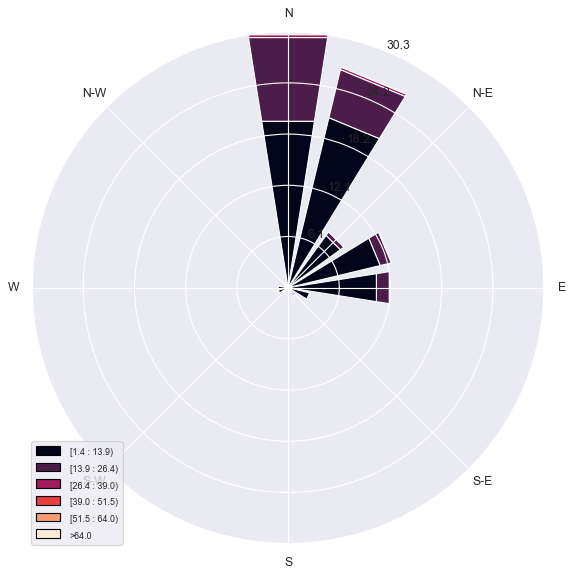

In [ ]:


from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = df["WS"]
wd = df["WD"]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

<AxesSubplot:>

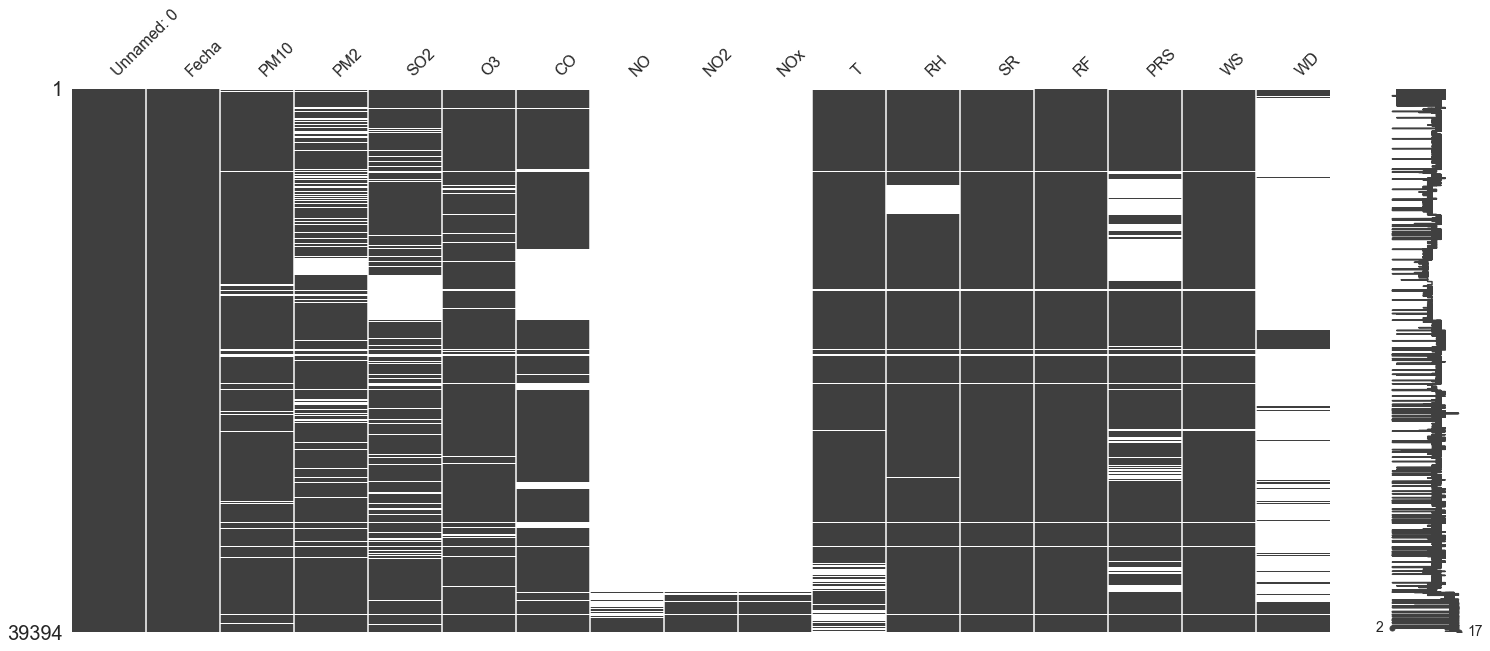

In [ ]:
import missingno as msno

msno.matrix(df)

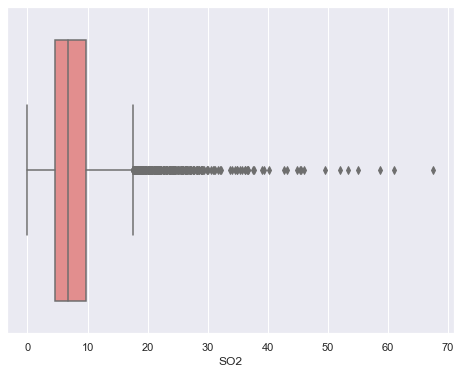

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x="SO2", color="lightcoral")
plt.savefig("SO2.png", dpi=100)

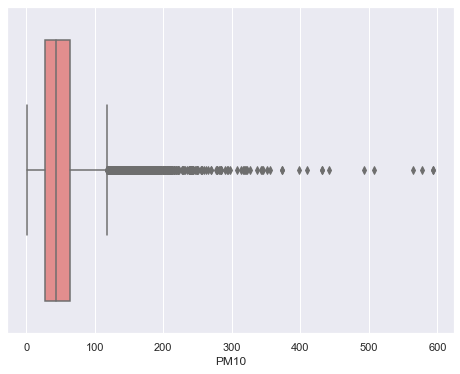

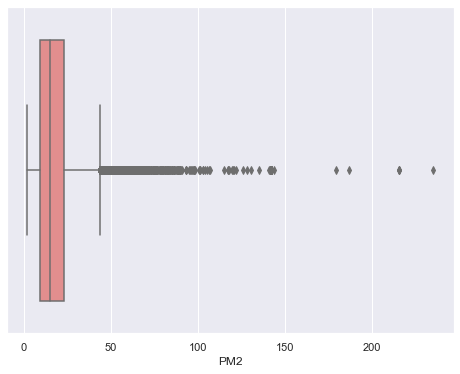

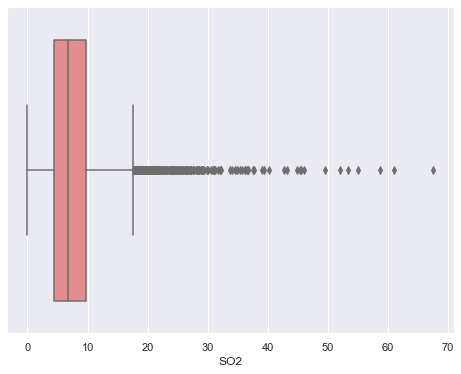

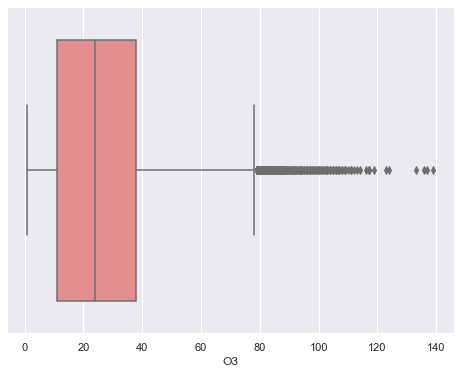

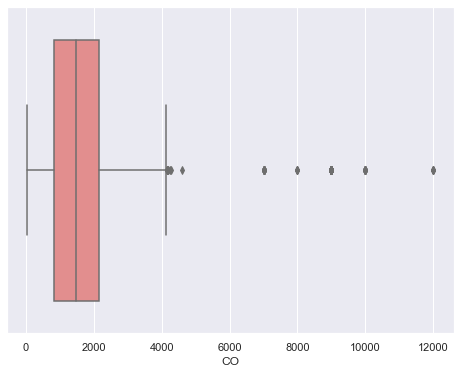

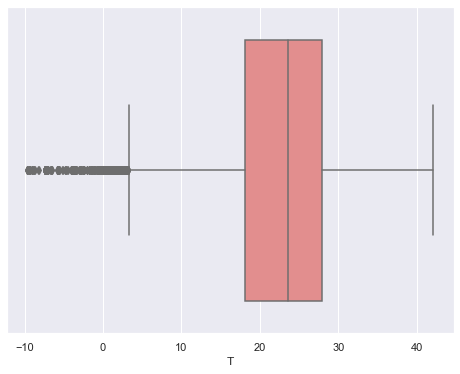

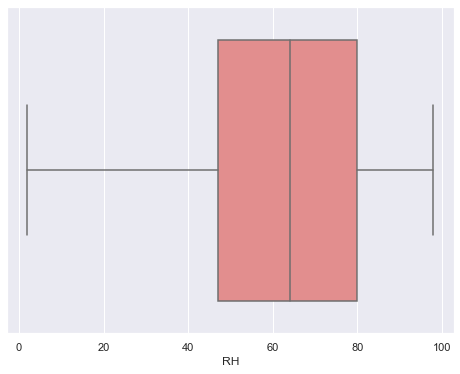

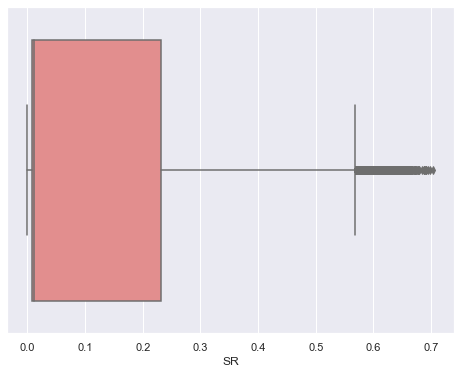

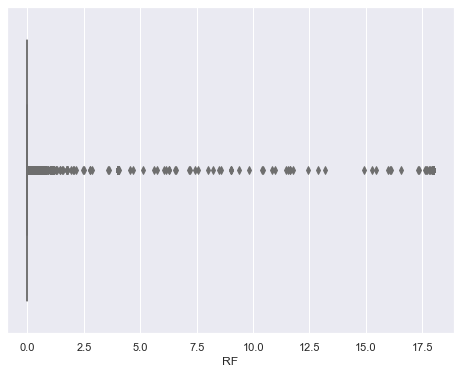

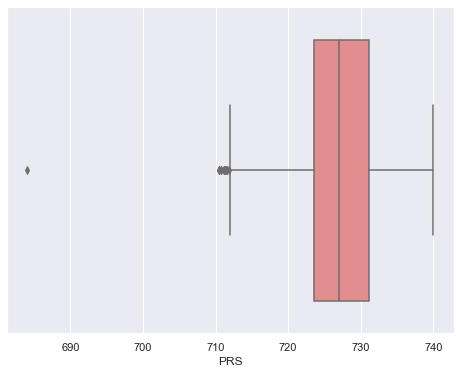

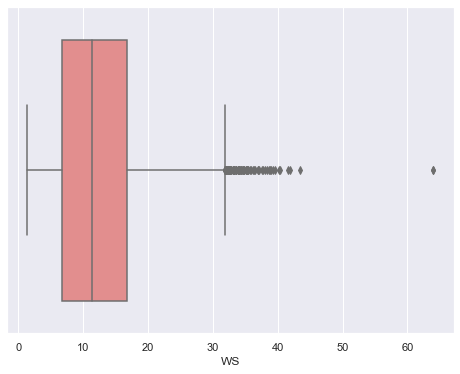

In [ ]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    sns.boxplot(data = df, x=i, color="lightcoral")
    plt.savefig(i, dpi=100)

In [ ]:
df.loc[df["PM10"] > 650, "PM10"] = np.nan 

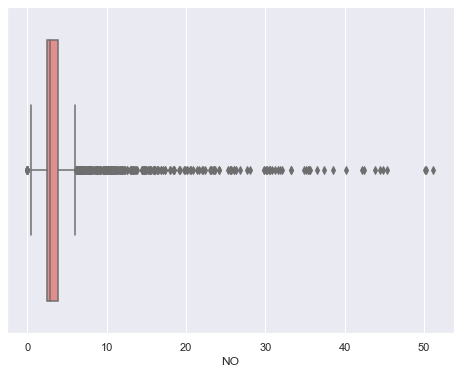

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x="NO", color="lightcoral")
plt.savefig("NO.png", dpi=100)

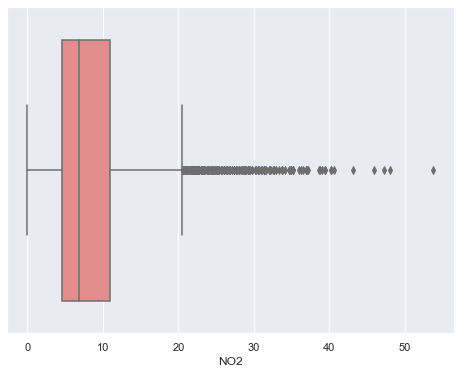

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x="NO2", color="lightcoral")
plt.savefig("NO2.png", dpi=100)

In [ ]:
def nan_description(data):
    rows = data.shape[0]        
    data_types = data.dtypes
    counts = data.apply(lambda x: x.count())
    unique_vals = data.apply(lambda x: x.unique().shape[0])
    dups = data.apply(lambda x: x.duplicated().sum())
    nulls = data.apply(lambda x: x.isnull().sum())
    null_percent = (data.isnull().sum()/rows)*100
    # cols = {'dtype':data_types, 'No. datos':counts, 'Valores unicos':unique_vals, 'Valores nulos':nulls, '% Nulos':null_percent}
    cols = {'dtype':data_types, 'No. datos':counts, 'Valores unicos':unique_vals, 'Valores duplicados':dups, 'Valores nulos':nulls, '% Nulos':null_percent}
    table = pd.DataFrame(data=cols)
    return table


In [ ]:
anime_null_tbl = nan_description(df)
anime_null_tbl.reset_index(level=[0],inplace =True)
anime_null_tbl.sort_values(by='Valores nulos', ascending=False)


index    dtype  No. datos  Valores unicos  Valores duplicados  \
7           NO  float64       2111             191               39203   
8          NO2  float64       2454             218               39176   
9          NOx  float64       2623             407               38987   
16          WD  float64       5369             313               39081   
14         PRS  float64      30059             292               39102   
6           CO  float64      31583             416               38978   
4          SO2  float64      31664             312               39082   
3          PM2  float64      32805            4602               34792   
11          RH  float64      36355              98               39296   
10           T  float64      36368            3664               35730   
5           O3  float64      37112             124               39270   
2         PM10  float64      37424            4809               34585   
15          WS  float64      38327             351               39043   
13          RF  float64      38496             159               39235   
12          SR  float64      38577             687               38707   
1        Fecha   object      39394           39394                   0   
0   Unnamed: 0    int64      39394           39394                   0   

    Valores nulos    % Nulos  
7           37283  94.641316  
8           36940  93.770625  
9           36771  93.341626  
16          34025  86.371021  
14           9335  23.696502  
6            7811  19.827893  
4            7730  19.622278  
3            6589  16.725897  
11           3039   7.714373  
10           3026   7.681373  
5            2282   5.792760  
2            1970   5.000762  
15           1067   2.708534  
13            898   2.279535  
12            817   2.073920  
1               0   0.000000  
0               0   0.000000

<AxesSubplot:>

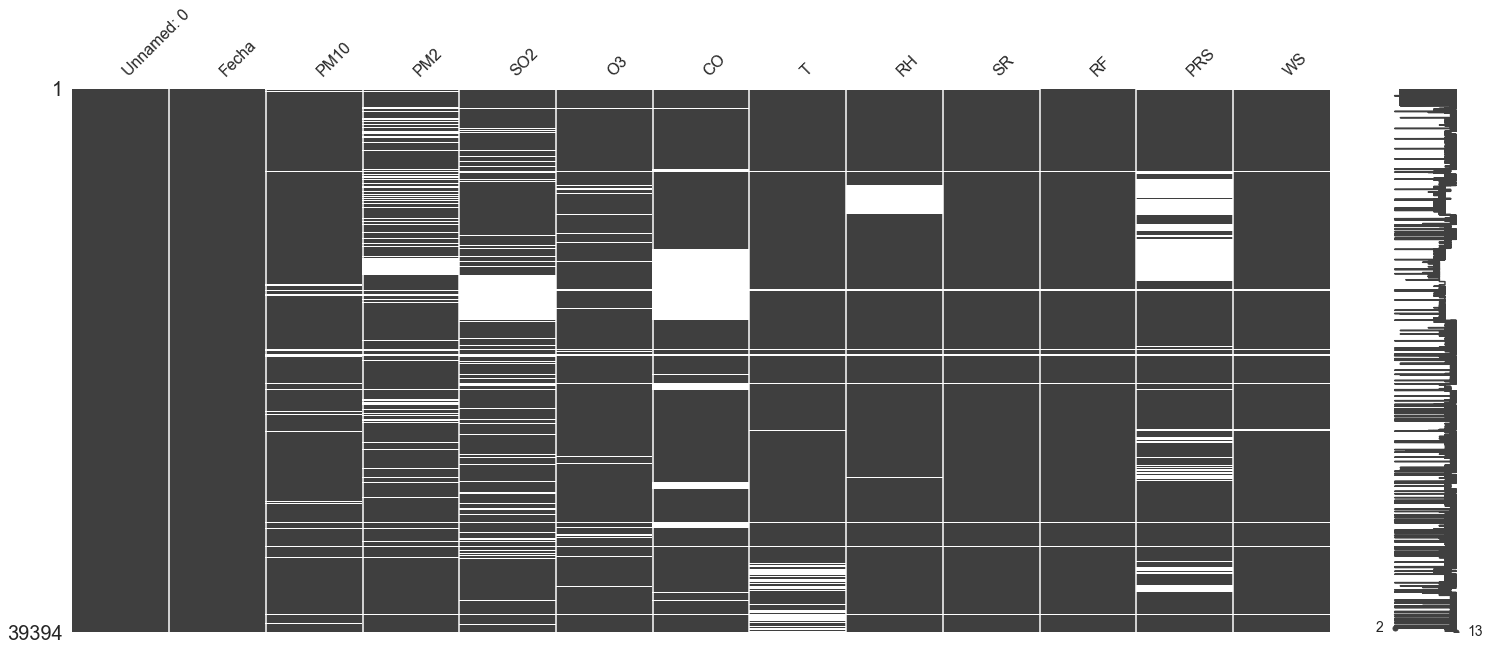

In [ ]:
for column in df.columns:
    if df[column].isnull().sum() >= 9848:
        df.drop(column, axis = 1, inplace = True)

msno.matrix(df)

In [ ]:
#df.drop("Unnamed: 0", axis=1, inplace=True)
#df.drop("X", axis=1, inplace=True)

#df.to_csv("datos_sin_nulos.csv")

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
#df = pd.read_csv("datos2.csv")
df2 = df


df2.fillna(method="ffill", limit=36, inplace=True)
#df2.loc[df2["PM10"].isna(), to_change] = np.nan


<AxesSubplot:>

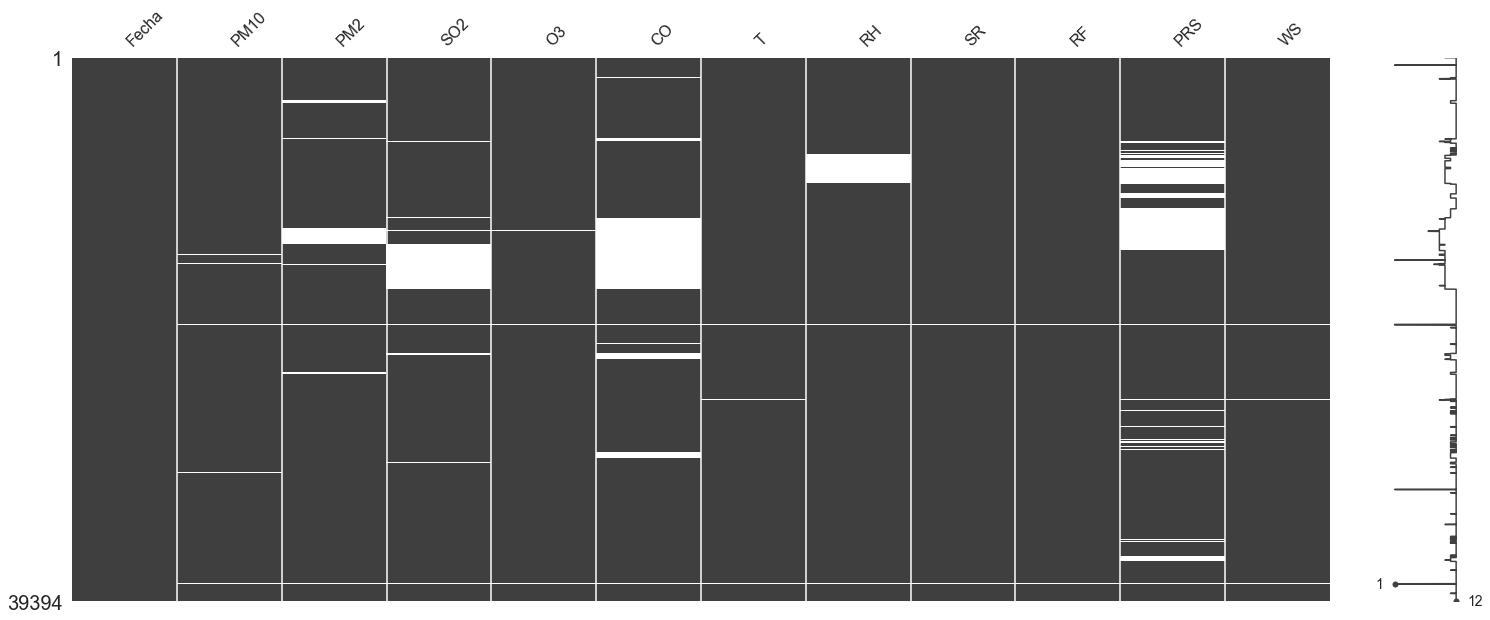

In [ ]:
msno.matrix(df2)

In [ ]:
for column in df2.columns:
    print(f" {column} : {df2[column].isna().sum()}")

df2.to_csv("Datos_sin_nulos.csv", index=False)


 Fecha : 0
 PM10 : 309
 PM2 : 1701
 SO2 : 3755
 O3 : 165
 CO : 6408
 T : 138
 RH : 2165
 SR : 106
 RF : 118
 PRS : 6661
 WS : 190


In [ ]:
df3.describe()

df3.to_csv("Datos_no_nulos.csv", index=False)

In [ ]:
df2.to_csv("clean_df.csv", index=False)

In [ ]:
df2.head()

Fecha   PM10    PM2   SO2   O3    CO      T    RH     SR  \
0  2017-01-01 00:00:00    NaN    NaN  11.8  6.0  3.77  18.71  72.0  0.007   
1  2017-01-01 01:00:00  373.0  349.0  16.7  5.0  3.01  19.67  64.0  0.007   
2  2017-01-01 02:00:00  373.0  187.0  16.1  4.0  1.80  22.33  51.0  0.007   
3  2017-01-01 03:00:00  124.0  101.0  13.7  4.0  2.11  20.51  58.0  0.007   
4  2017-01-01 04:00:00  124.0   81.0  11.9  4.0  1.77  20.22  60.0  0.007   

    RF    PRS    WS  
0  0.0  720.5   8.8  
1  0.0  720.1  13.1  
2  0.0  719.6  12.9  
3  0.0  719.5   9.1  
4  0.0  719.1   9.2

In [ ]:
del df['Fecha']


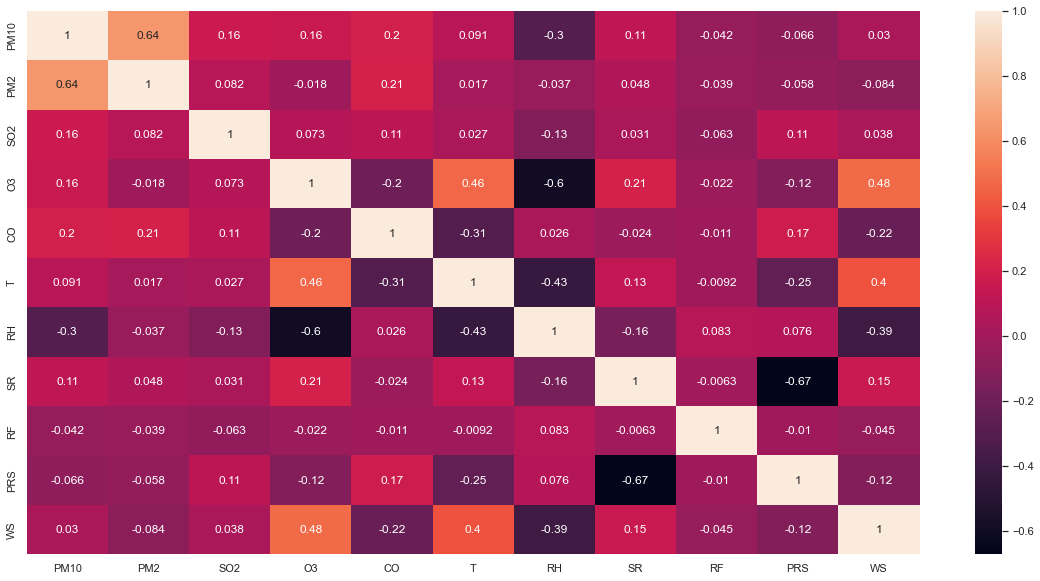

In [ ]:
#datos = pd.read_csv("datos_limpios.csv")

plt.figure(figsize=(20,10))
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


# Creción de algunos gráficos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('clean_df.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

Fecha   PM10    PM2   SO2   O3      CO      T    RH     SR  \
0 2017-01-01 00:00:00    NaN    NaN  11.8  6.0  3770.0  18.71  72.0  0.007   
1 2017-01-01 01:00:00  373.0    NaN  16.7  5.0  3010.0  19.67  64.0  0.007   
2 2017-01-01 02:00:00  373.0  187.0  16.1  4.0  1800.0  22.33  51.0  0.007   
3 2017-01-01 03:00:00  124.0  101.0  13.7  4.0  2110.0  20.51  58.0  0.007   
4 2017-01-01 04:00:00  124.0   81.0  11.9  4.0  1770.0  20.22  60.0  0.007   

    RF    PRS    WS  
0  0.0  720.5   8.8  
1  0.0  720.1  13.1  
2  0.0  719.6  12.9  
3  0.0  719.5   9.1  
4  0.0  719.1   9.2

In [ ]:
start_date = '2020-01-01 00:00:00'
end_date = '2021-01-01 00:00:00'

mask = (df.Fecha >= start_date) & (df.Fecha <= end_date)
df.loc[mask]

Fecha    PM10     PM2  SO2    O3      CO      T    RH  \
26275 2020-01-01 00:00:00   66.00   54.23  5.4  20.0  2190.0  10.96  96.0   
26276 2020-01-01 01:00:00   57.00   54.23  5.4  19.0  2110.0  11.20  96.0   
26277 2020-01-01 02:00:00   68.00   53.84  5.5  19.0  2060.0  11.26  96.0   
26278 2020-01-01 03:00:00   68.00   36.47  5.4  19.0  1960.0  11.35  96.0   
26279 2020-01-01 04:00:00   48.00   33.59  5.5  16.0  1980.0  11.47  96.0   
...                   ...     ...     ...  ...   ...     ...    ...   ...   
35047 2020-12-31 20:00:00   59.34   15.61  6.6  17.0  2580.0  -1.55  39.0   
35048 2020-12-31 21:00:00  137.21   83.22  6.5  10.0  2900.0  -1.55  48.0   
35049 2020-12-31 22:00:00  167.26  118.08  6.6   7.0  3190.0  -1.55  65.0   
35050 2020-12-31 23:00:00   96.57   67.32  6.4  14.0  2890.0  -1.55  72.0   
35051 2021-01-01 00:00:00  111.86   79.19  6.3   9.0  3020.0  -1.55  75.0   

          SR    RF    PRS    WS  
26275  0.010  0.01  735.7   7.4  
26276  0.010  0.00  735.7   8.1  
26277  0.010  0.00  734.8   5.5  
26278  0.010  0.00  734.2   3.8  
26279  0.010  0.00  733.9   3.3  
...      ...   ...    ...   ...  
35047  0.007  0.00  738.5   7.4  
35048  0.007  0.00  738.5   6.1  
35049  0.007  0.00  738.5   9.1  
35050  0.007  0.00  738.5  14.7  
35051  0.007  0.00  738.5   6.6  

[8777 rows x 12 columns]

In [ ]:
df2 = df.dropna()

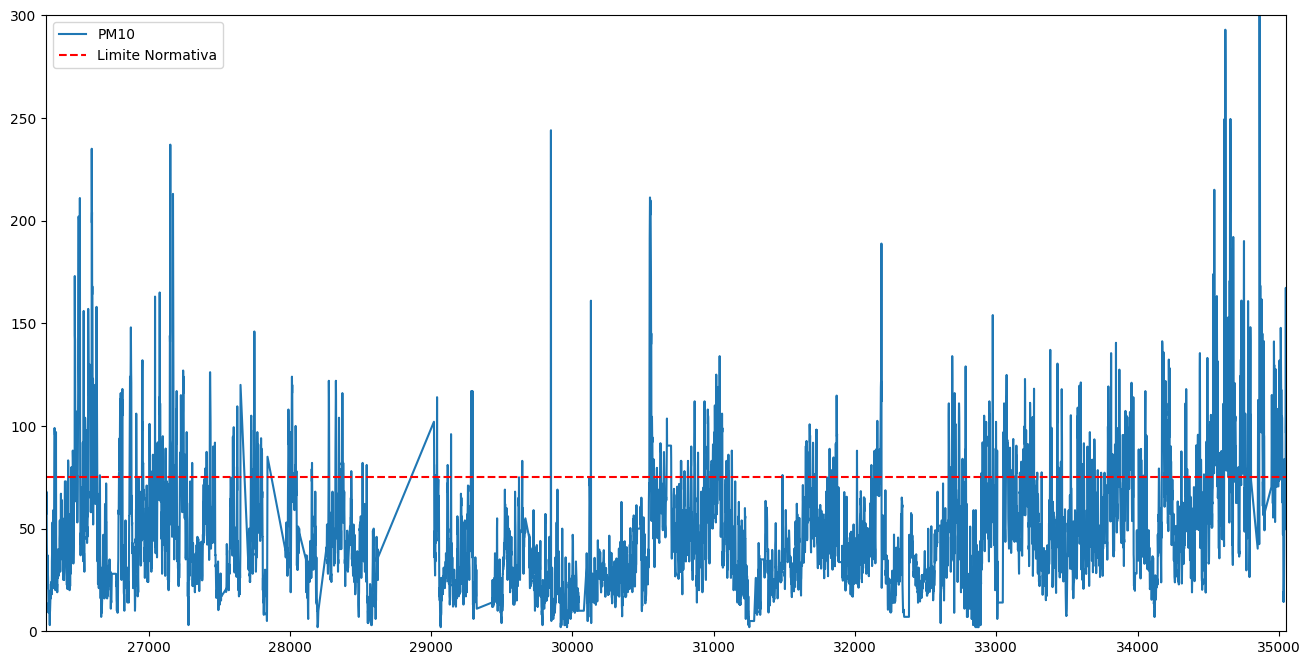

In [ ]:
ax = df2[['PM10']].plot(label='PM10',
                                  figsize=(16, 8),
                                  xlim=(26275,35051),
                                  ylim= (0, 300))
ax.hlines(75,  xmin = 26275, xmax = 35051, linestyles="--", colors="red", label = "Limite Normativa")
ax.legend()

In [ ]:
counter = 0

for i in range (8776):
    if df['PM10'][i+26275] >= 75:
        counter += 1

print("Veces que PM10 sobrepasó la normativa en 2020: ", counter)

Veces que PM10 sobrepasó la normativa en 2020:  1346


In [ ]:
pm10SUPER = df2.loc[df['PM10'] >= 75]
#pm10SUPER

pm10SUPER2 = pm10SUPER.loc[(df['Fecha'] >= '2020-01-01 00:00:00')
                    & (pm10SUPER['Fecha'] <= '2021-01-01 00:00:00')]


#pm10SUPER2.to_csv('pm25SUPER2.csv')
pm10SUPER2

Fecha    PM10     PM2  SO2    O3      CO      T    RH  \
26334 2020-03-01 11:00:00   77.00    5.87  7.2  32.0  1750.0  20.86  32.0   
26335 2020-03-01 12:00:00   99.00    5.55  6.4  35.0  1720.0  19.75  33.0   
26336 2020-03-01 13:00:00   96.00    4.61  6.1  37.0  1720.0  20.51  32.0   
26337 2020-03-01 14:00:00   96.00    4.61  6.1  37.0  1720.0  20.51  32.0   
26345 2020-03-01 22:00:00   97.00    7.31  6.9  15.0  1790.0  16.62  33.0   
...                   ...     ...     ...  ...   ...     ...    ...   ...   
35040 2020-12-31 13:00:00   83.94   12.18  6.4  27.0  2540.0  -7.11  39.0   
35048 2020-12-31 21:00:00  137.21   83.22  6.5  10.0  2900.0  -1.55  48.0   
35049 2020-12-31 22:00:00  167.26  118.08  6.6   7.0  3190.0  -1.55  65.0   
35050 2020-12-31 23:00:00   96.57   67.32  6.4  14.0  2890.0  -1.55  72.0   
35051 2021-01-01 00:00:00  111.86   79.19  6.3   9.0  3020.0  -1.55  75.0   

          SR   RF    PRS    WS  
26334  0.352  0.0  735.4  30.0  
26335  0.230  0.0  735.7  37.8  
26336  0.420  0.0  735.5  29.6  
26337  0.420  0.0  735.5  29.6  
26345  0.007  0.0  739.3  14.3  
...      ...  ...    ...   ...  
35040  0.318  0.0  738.5  29.6  
35048  0.007  0.0  738.5   6.1  
35049  0.007  0.0  738.5   9.1  
35050  0.007  0.0  738.5  14.7  
35051  0.007  0.0  738.5   6.6  

[1216 rows x 12 columns]

In [ ]:
pm10SUPER2['Fecha'] = pm10SUPER2['Fecha'].astype(str)
pm10SUPER3 = pm10SUPER2.Fecha.str.split(pat=' ',expand=True)

pm10 = pm10SUPER2["PM10"]

pm10SUPER3 = pm10SUPER3.join(pm10)

#pm10SUPER3.to_csv('o3SUPER3.csv')
pm10SUPER3

/var/folders/9j/098kzl7s71l_ynf3424vzxh40000gn/T/ipykernel_4143/3101090725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10SUPER2['Fecha'] = pm10SUPER2['Fecha'].astype(str)


0         1    PM10
26334  2020-03-01  11:00:00   77.00
26335  2020-03-01  12:00:00   99.00
26336  2020-03-01  13:00:00   96.00
26337  2020-03-01  14:00:00   96.00
26345  2020-03-01  22:00:00   97.00
...           ...       ...     ...
35040  2020-12-31  13:00:00   83.94
35048  2020-12-31  21:00:00  137.21
35049  2020-12-31  22:00:00  167.26
35050  2020-12-31  23:00:00   96.57
35051  2021-01-01  00:00:00  111.86

[1216 rows x 3 columns]

In [ ]:
pm10SUPER3 = pd.read_csv('pm10SUPER3.csv')
pm10SUPER3

Fecha      Hora    PM10
0     03/01/20  11:00:00   77.00
1     03/01/20  12:00:00   99.00
2     03/01/20  13:00:00   96.00
3     03/01/20  14:00:00   96.00
4     03/01/20  22:00:00   97.00
...        ...       ...     ...
1211  31/12/20  13:00:00   83.94
1212  31/12/20  21:00:00  137.21
1213  31/12/20  22:00:00  167.26
1214  31/12/20  23:00:00   96.57
1215  01/01/21  00:00:00  111.86

[1216 rows x 3 columns]

In [ ]:
pm10_horas = pm10SUPER3.sort_values(by=['Hora'], ascending=True)
pm10_horas

Fecha      Hora    PM10
1215  01/01/21  00:00:00  111.86
1112  20/12/20  00:00:00   86.02
409   03/07/20  00:00:00   90.43
67    14/01/20  00:00:00  106.00
1095  19/12/20  00:00:00   85.43
...        ...       ...     ...
408   02/07/20  23:00:00   90.43
127   25/01/20  23:00:00  134.00
748   31/10/20  23:00:00  119.58
558   01/09/20  23:00:00   80.50
696   15/10/20  23:00:00  122.87

[1216 rows x 3 columns]

In [ ]:
pm10_horas.groupby(['Hora']).count()

Fecha  PM10
Hora                 
00:00:00     41    41
01:00:00     31    31
02:00:00     28    28
03:00:00     18    18
04:00:00     16    16
05:00:00     16    16
06:00:00     18    18
07:00:00     25    25
08:00:00     46    46
09:00:00     67    67
10:00:00     99    99
11:00:00    106   106
12:00:00    111   111
13:00:00    100   100
14:00:00     87    87
15:00:00     59    59
16:00:00     45    45
17:00:00     42    42
18:00:00     40    40
19:00:00     51    51
20:00:00     39    39
21:00:00     47    47
22:00:00     42    42
23:00:00     42    42

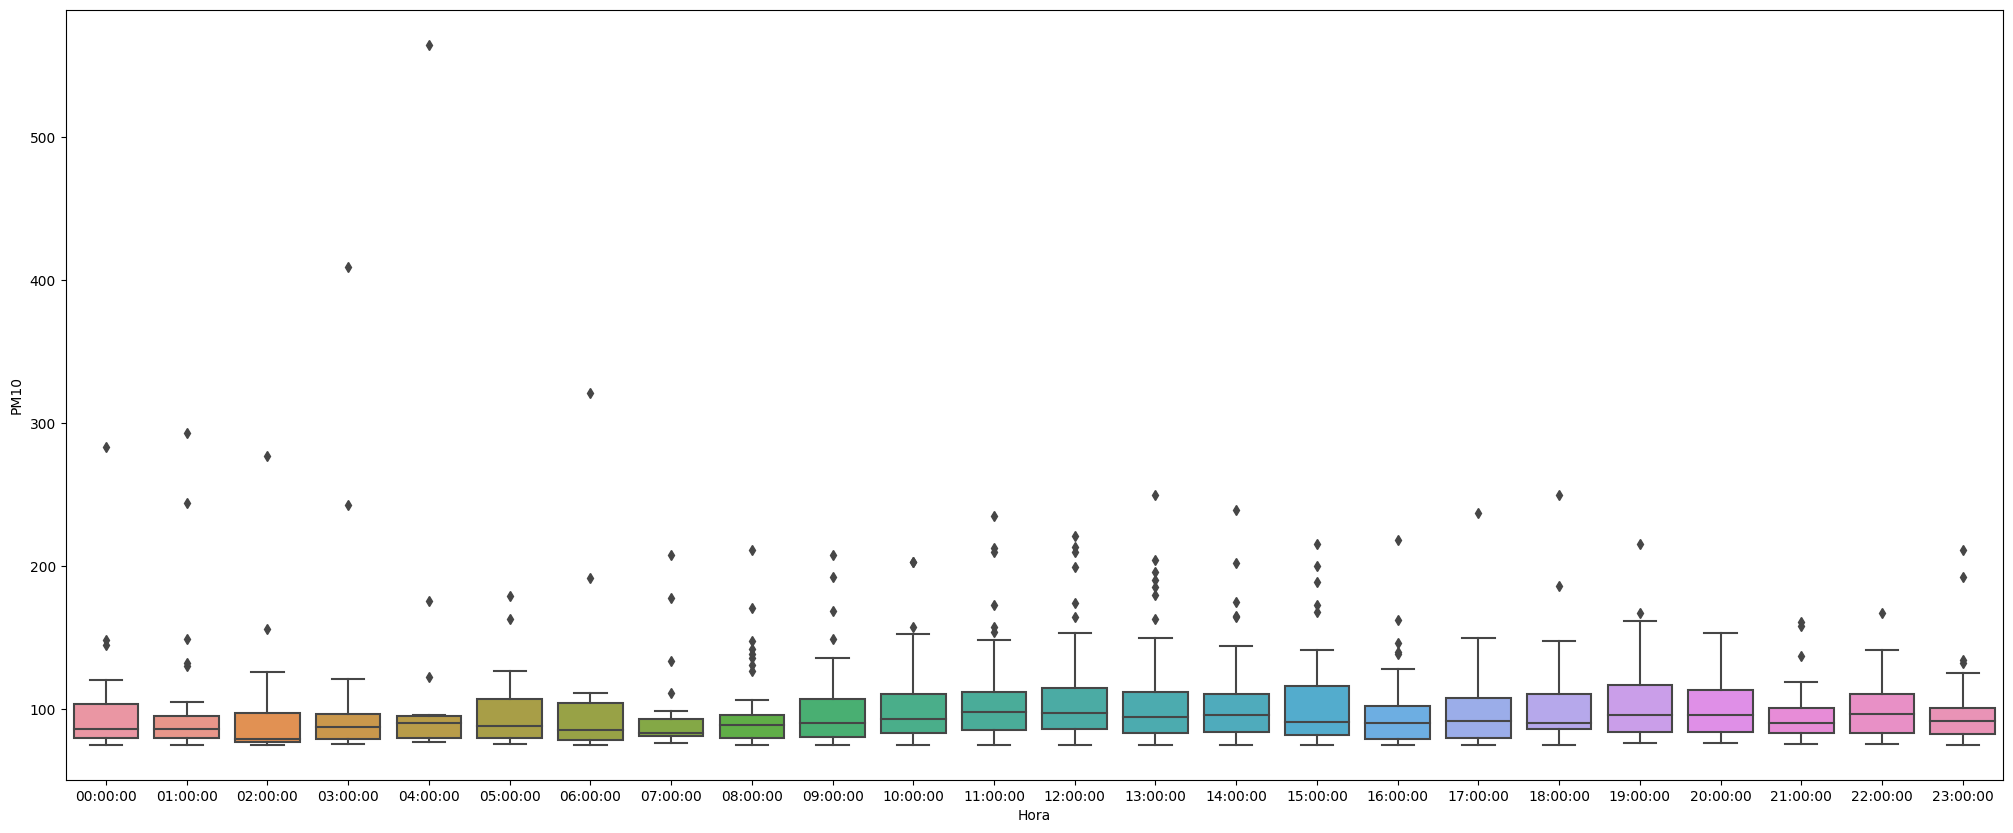

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Hora', y='PM10', data=pm10_horas)

medians = pm10_horas.groupby(['Hora'])['PM10'].median().values
nobs = pm10_horas['Hora'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
 
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U8'), dtype('float64')) -> None

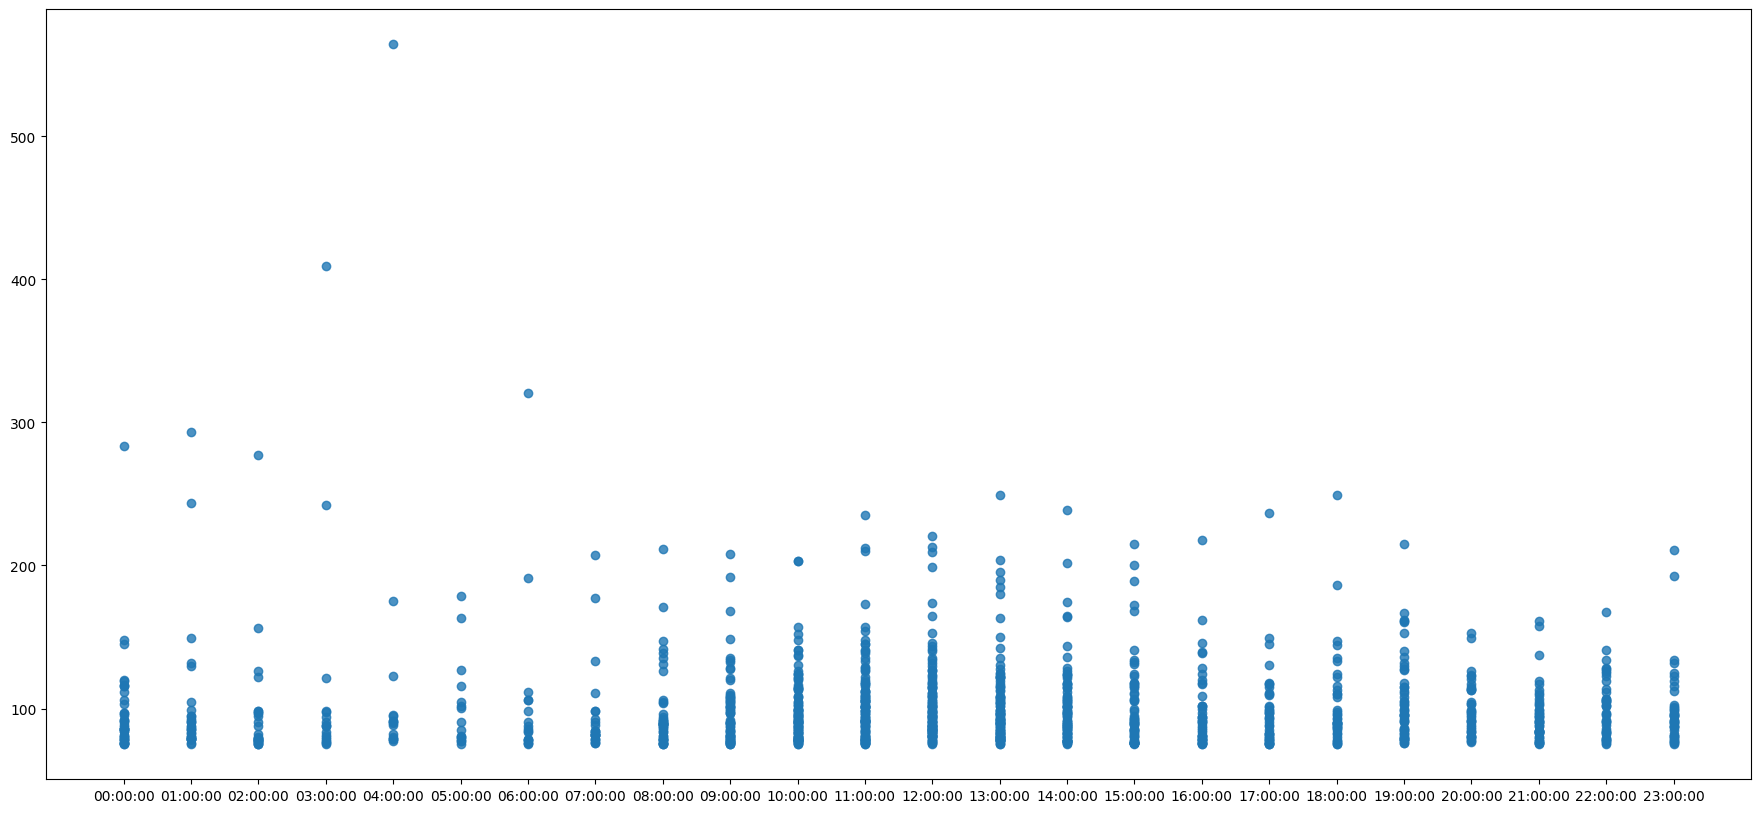

In [ ]:
plt.figure(figsize=(22,10))
sns.regplot(x=pm10_horas["Hora"], y=pm10_horas["PM10"])

In [ ]:
pm10SUPER3['monthyear'] = pd.to_datetime(pm10SUPER3['Fecha']).dt.to_period('M')
pm10SUPER3

Fecha      Hora    PM10 monthyear
0     03/01/20  11:00:00   77.00   2020-03
1     03/01/20  12:00:00   99.00   2020-03
2     03/01/20  13:00:00   96.00   2020-03
3     03/01/20  14:00:00   96.00   2020-03
4     03/01/20  22:00:00   97.00   2020-03
...        ...       ...     ...       ...
1211  31/12/20  13:00:00   83.94   2020-12
1212  31/12/20  21:00:00  137.21   2020-12
1213  31/12/20  22:00:00  167.26   2020-12
1214  31/12/20  23:00:00   96.57   2020-12
1215  01/01/21  00:00:00  111.86   2021-01

[1216 rows x 4 columns]

In [ ]:
by_month = pd.to_datetime(pm10SUPER3['Fecha']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
df_month

month  counts
0   2020-01     118
1   2020-02      77
2   2020-03     120
3   2020-04      31
4   2020-05      27
5   2020-06      62
6   2020-07      86
7   2020-08      60
8   2020-09      85
9   2020-10     145
10  2020-11     148
11  2020-12     256
12  2021-01       1

In [ ]:
df_month["month"].replace({"2020-01":"Enero", "2020-02":"Febrero", "2020-03":"Marzo", 
                            "2020-04":"Abril", "2020-05":"Mayo", "2020-06":"Junio", 
                            "2020-07":"Julio", "2020-08":"Agosto", "2020-09":"Septiembre",
                            "2020-10":"Octubre", "2020-11":"Noviembre", "2020-12":"Diciembre"}, inplace=True)
df_month

month  counts
0        Enero     118
1      Febrero      77
2        Marzo     120
3        Abril      31
4         Mayo      27
5        Junio      62
6        Julio      86
7       Agosto      60
8   Septiembre      85
9      Octubre     145
10   Noviembre     148
11   Diciembre     256
12     2021-01       1

Text(0.5, 0, 'PM10 2020')

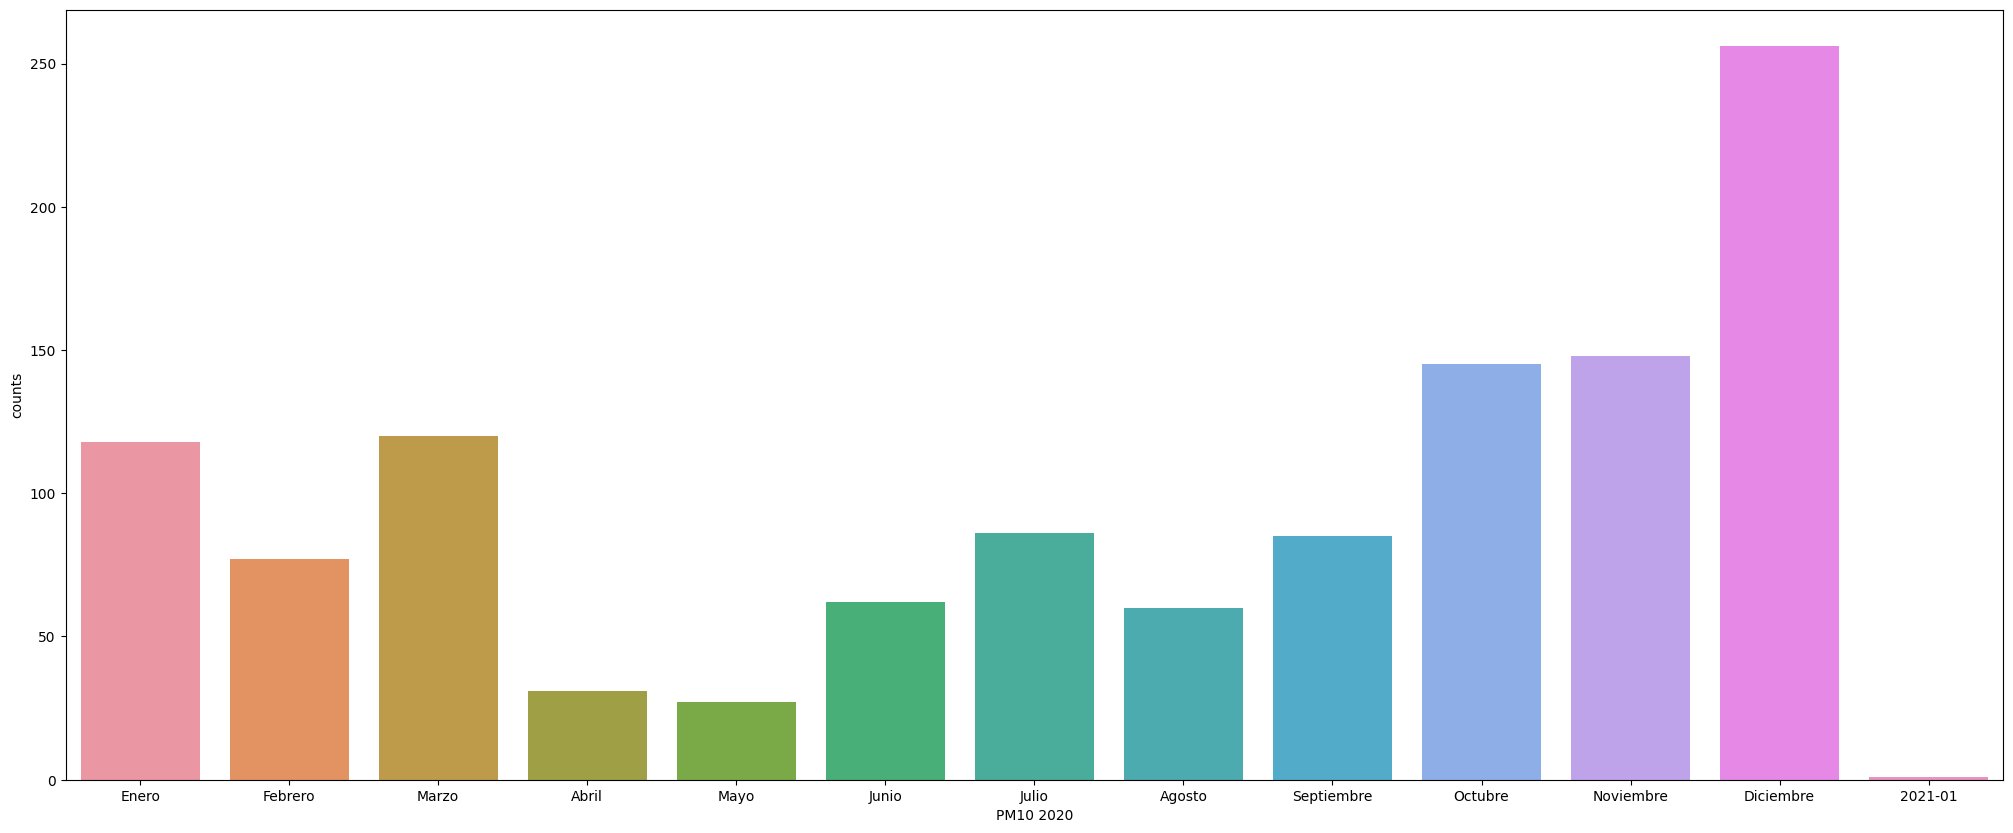

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x='month', y='counts', data=df_month)
ax.set_xlabel('PM10 2020')

# Modelación

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split



from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, f1_score, recall_score



sns.set_theme()

In [ ]:
df = pd.read_csv('datos/clean_df.csv')

In [ ]:
df["PromedioMovil"] = df["PM10"].rolling(window=24, min_periods=18, center=False, closed='both').mean()

In [ ]:
df['NormativaPromedio'] = [1 if x >= 75 else 0 for x in df['PromedioMovil']]

In [ ]:
df["NormativaPromedio"].value_counts()

0    34279
1     5115
Name: NormativaPromedio, dtype: int64

In [ ]:
df.to_csv("datos_clasificación.csv", index=False)

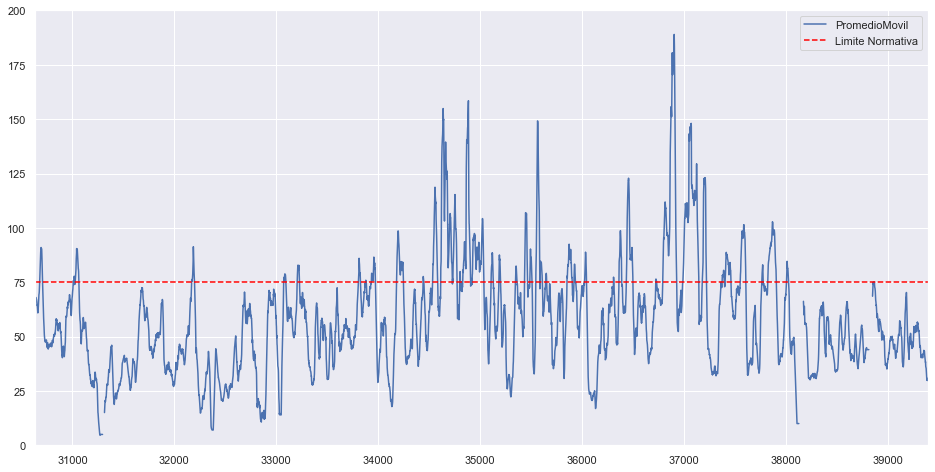

In [ ]:
ax = df[['PromedioMovil']].plot(label='PM10',
                                  figsize=(16, 8),
                                  xlim=(30634,39394),
                                  ylim= (0, 200))
ax.hlines(75,  xmin = 30634, xmax = 39394, linestyles="--", colors="red", label = "Limite Normativa")
ax.legend()

In [ ]:
data = df.drop(["PM10", "PromedioMovil", "Fecha"], axis=1)
data.dropna(inplace=True)

In [ ]:
data.to_csv("clasificacion_no_na.csv", index=False)

In [ ]:
data.head()

PM2   SO2   O3      CO      T    RH     SR   RF    PRS    WS  \
2  187.0  16.1  4.0  1800.0  22.33  51.0  0.007  0.0  719.6  12.9   
3  101.0  13.7  4.0  2110.0  20.51  58.0  0.007  0.0  719.5   9.1   
4   81.0  11.9  4.0  1770.0  20.22  60.0  0.007  0.0  719.1   9.2   
5   81.0  11.9  4.0  1770.0  20.22  60.0  0.007  0.0  719.1   9.2   
6   52.0  10.2  3.0  1600.0  18.48  69.0  0.007  0.0  719.9   7.6   

   NormativaPromedio  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0

## Entrenamiento y selección de modelo

In [ ]:
x = np.array(data.drop("NormativaPromedio", axis = 1))
y = np.array(data["NormativaPromedio"])



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# check version number
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=121022)
x_res, y_res = sm.fit_resample(x, y)



x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=121022)



#model = LogisticRegression(max_iter = 5000)



#model = DecisionTreeClassifier(criterion="gini")
model = RandomForestClassifier()

model.fit(x_train, y_train)
predict = model.predict(x_test)
report = classification_report(y_test, predict)



print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6071
           1       0.91      0.89      0.90      3050

    accuracy                           0.93      9121
   macro avg       0.93      0.92      0.93      9121
weighted avg       0.93      0.93      0.93      9121



In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


print("________ CLASE 0 ________")
print(f"Recall: {round(recall_score(y_test, predict, pos_label=0)*100, 3,) }%")
print(f"Precision: {round(precision_score(y_test, predict, pos_label=0)*100, 3) }%")
print(f"F1 Score: {round(f1_score(y_test, predict, pos_label=0)*100, 3) }%")

print("________ CLASE 1 ________")
print(f"Recall: {round(recall_score(y_test, predict)*100, 3,) }%")
print(f"Precision: {round(precision_score(y_test, predict)*100, 3) }%")
print(f"F1 Score: {round(f1_score(y_test, predict)*100, 3) }%")




print(f"Accuracy Score: {round(accuracy_score(y_test, predict)*100, 3) }%")

________ CLASE 0 ________
Recall: 95.586%
Precision: 94.573%
F1 Score: 95.077%
________ CLASE 1 ________
Recall: 89.082%
Precision: 91.022%
F1 Score: 90.041%
Accuracy Score: 93.411%


Text(147.50000000000003, 0.5, 'Predicted Class')

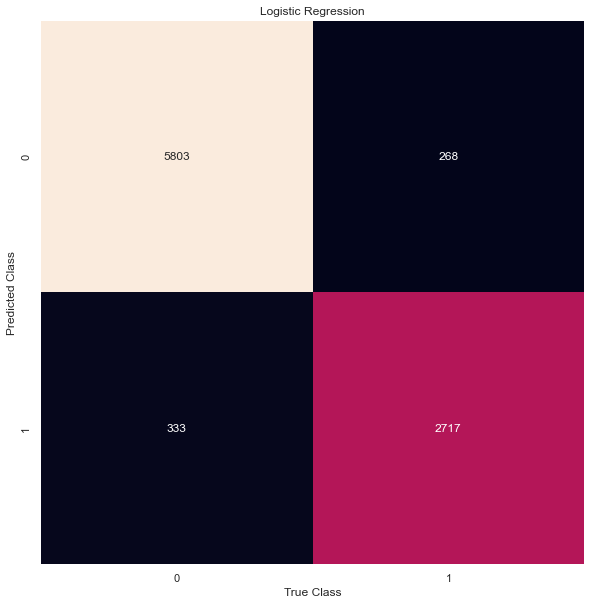

In [ ]:
plt.figure(figsize=(12,10))
ax1 = sns.heatmap(data=confusion_matrix(y_test, predict), annot=True, square=True, cbar=False, fmt='g')
ax1.set_title("Logistic Regression")
ax1.set_xlabel("True Class")
ax1.set_ylabel("Predicted Class")



In [ ]:

columns = data.columns
resample = pd.DataFrame(x_res, columns=columns[:-1])
resample["NormativaPromedio"] =  y_res


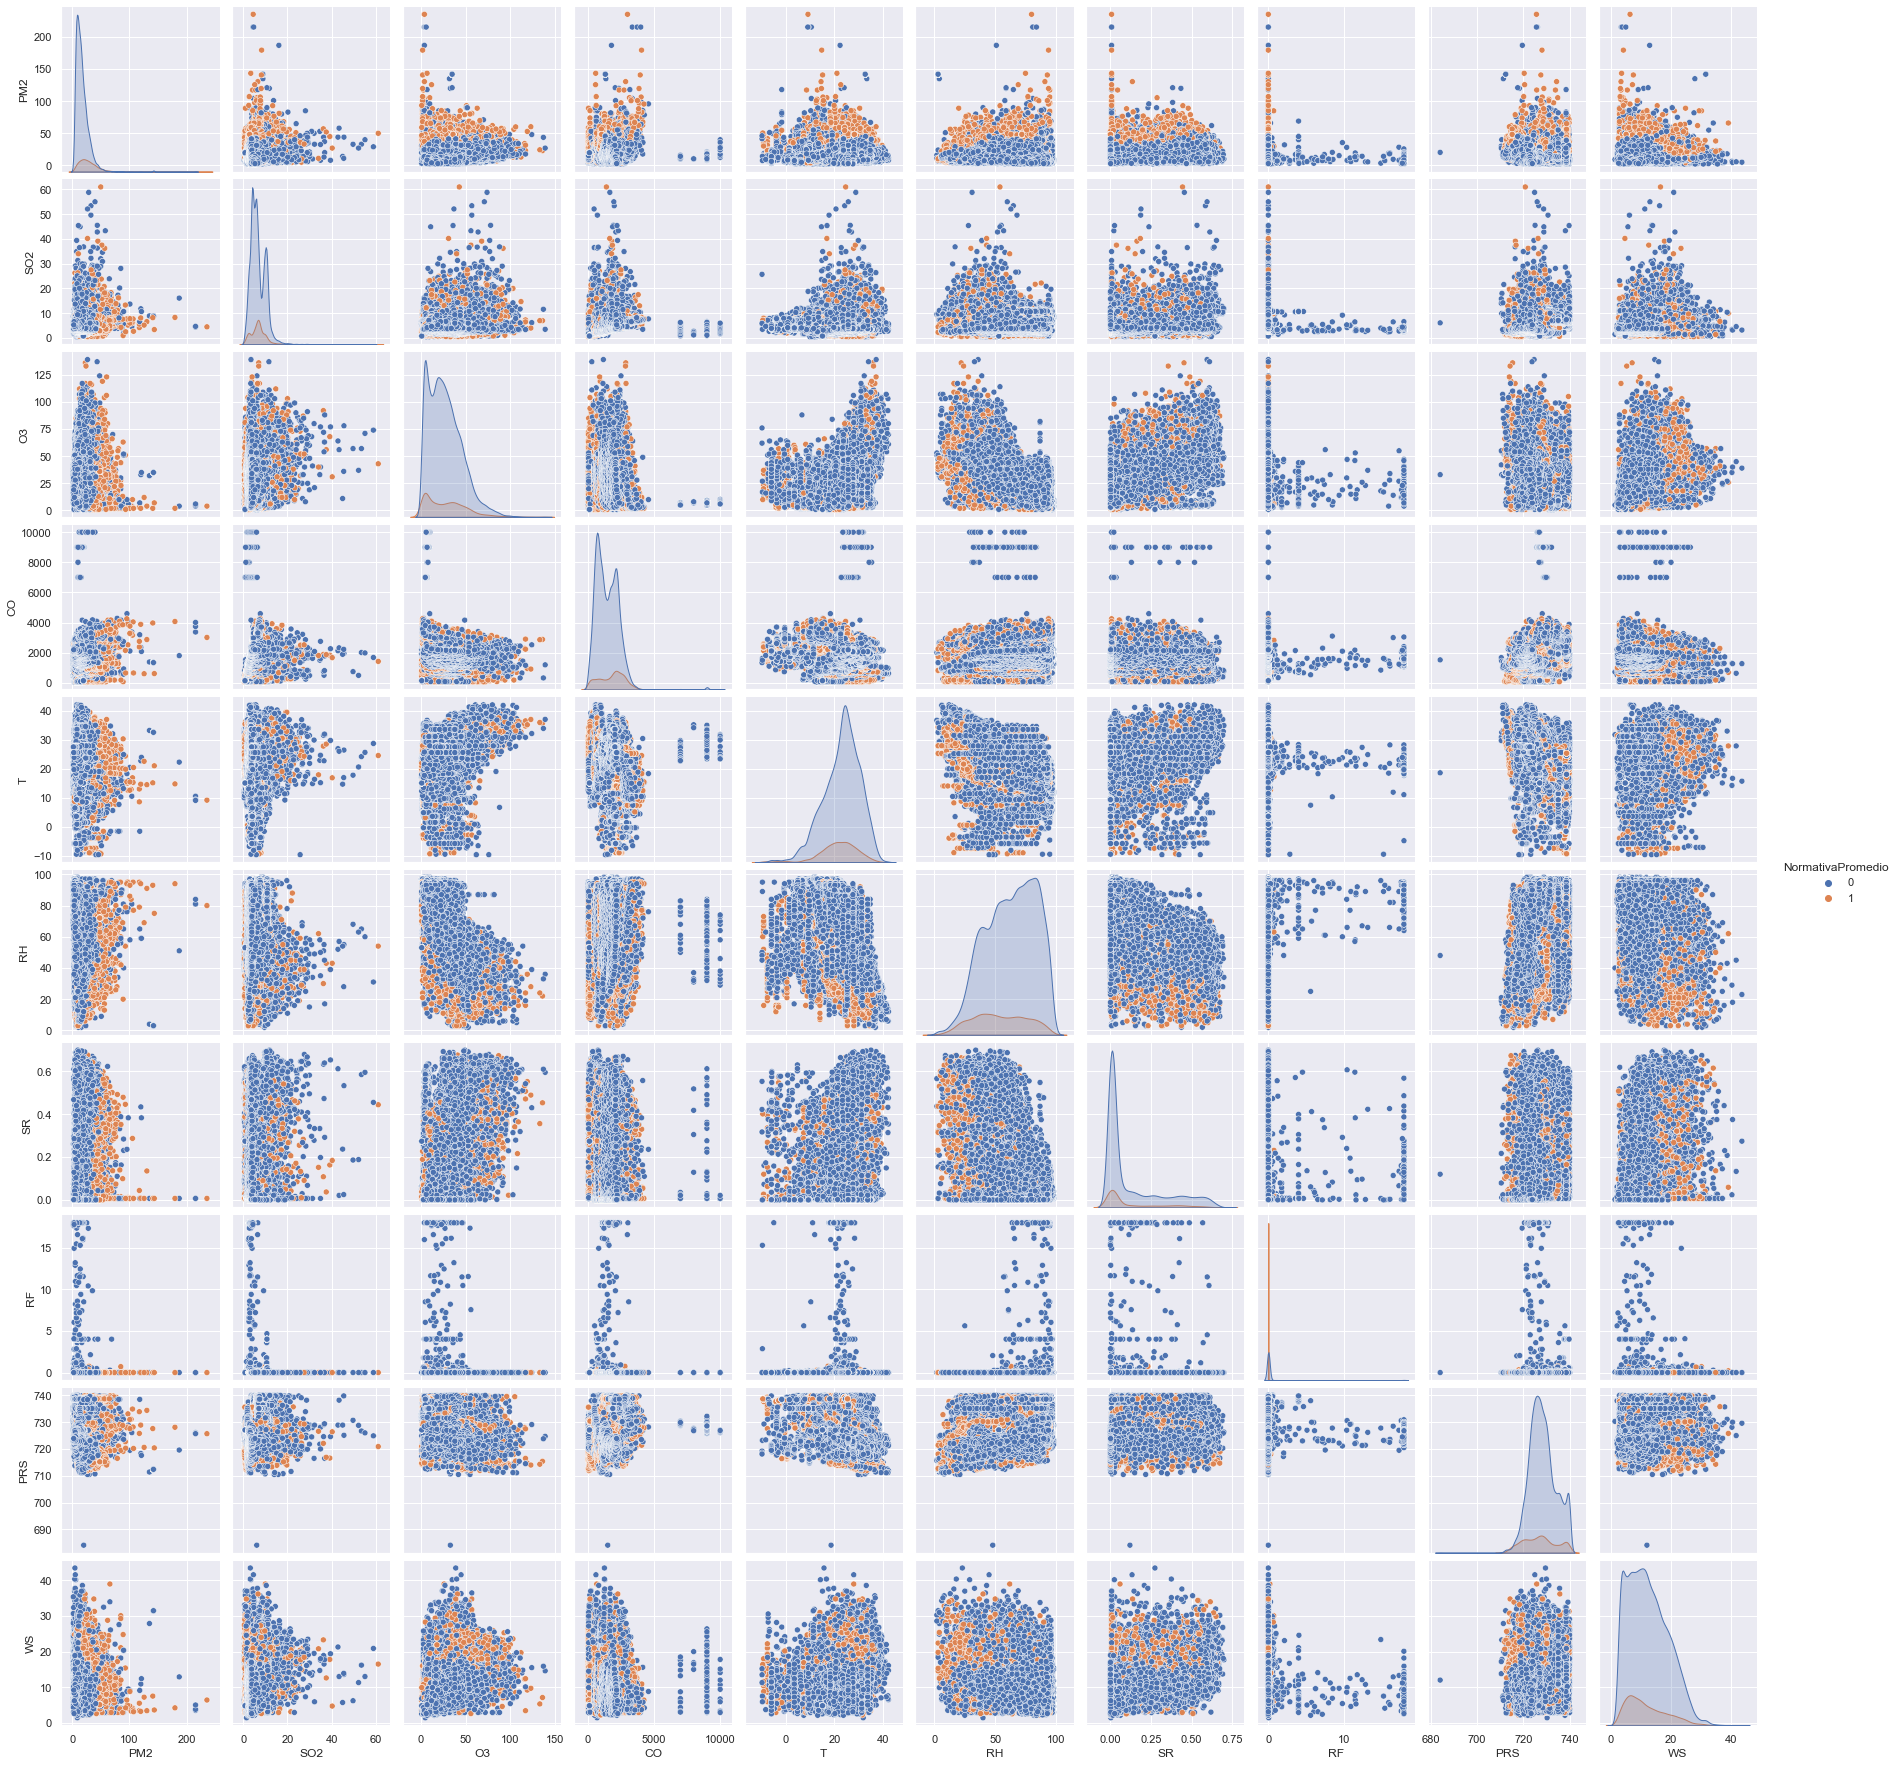

In [ ]:
sns.pairplot(data=data, hue="NormativaPromedio")

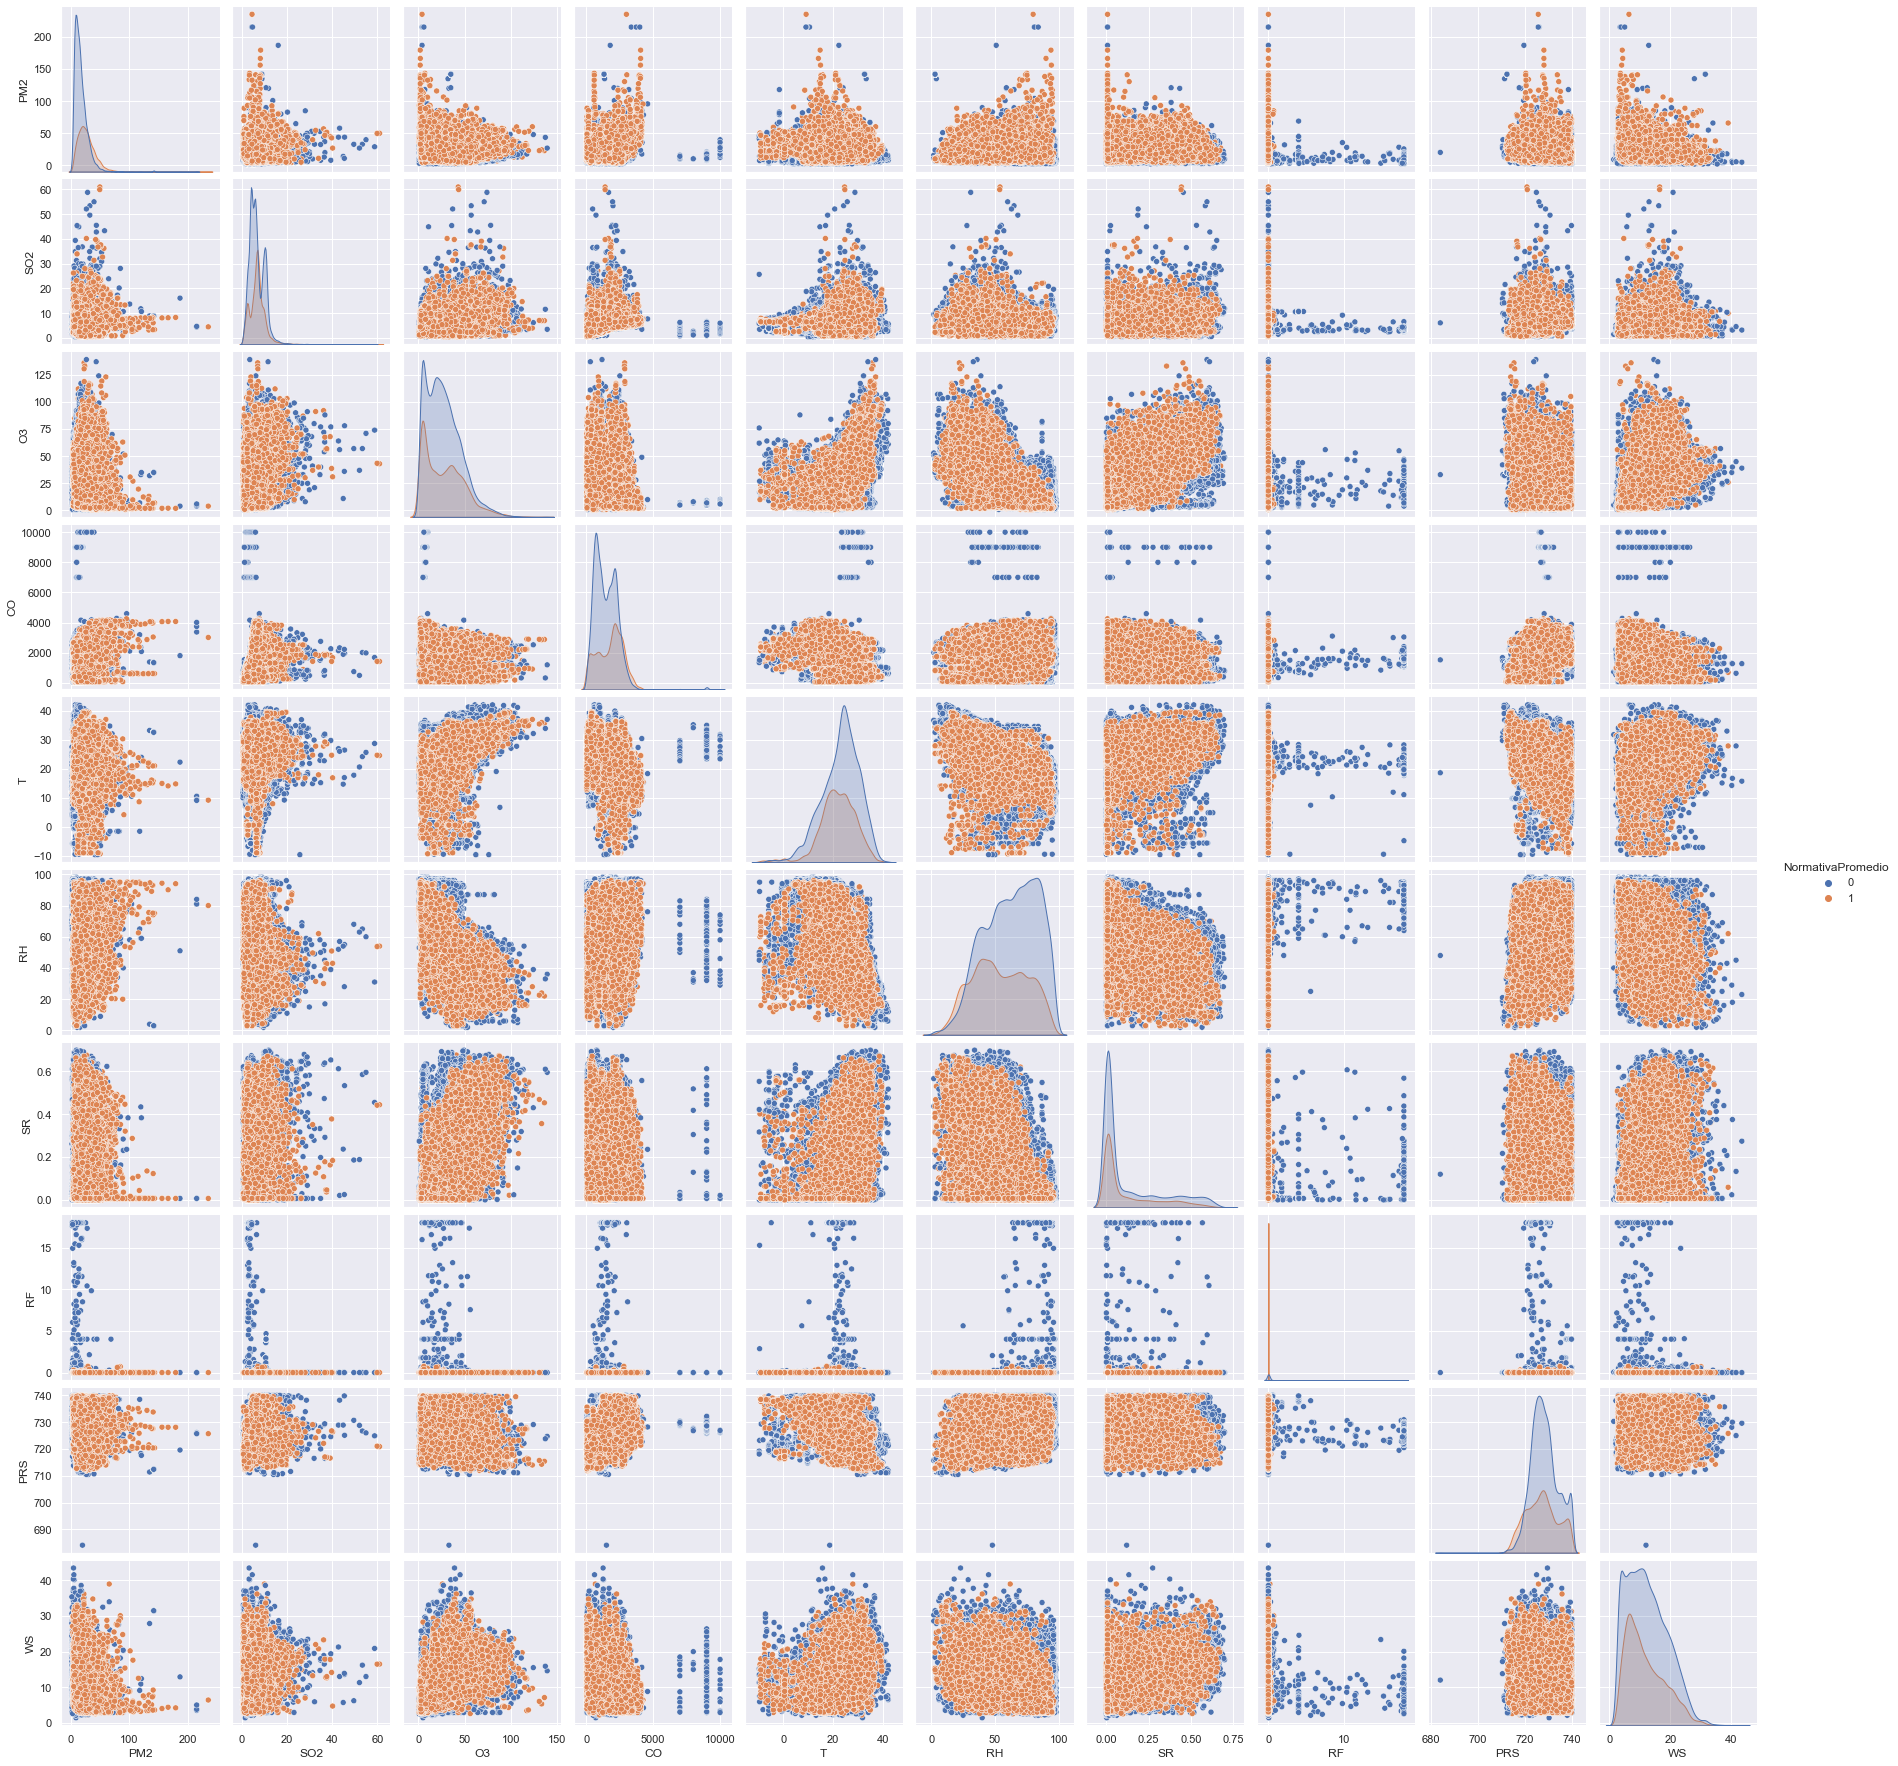

In [ ]:
sns.pairplot(data=resample, hue="NormativaPromedio")